In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from flaml import AutoML
import lightgbm as lgb
import xgboost as xgb

%reload_ext kedro.ipython
%reload_kedro
%matplotlib inline

[08/15/24 13:19:08] INFO     Registered line magic '%reload_kedro'                                   ]8;id=832714;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=479439;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py#58\58]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=149364;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=229919;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py#60\60]8;;\

                    INFO     Resolved project path as:                                              ]8;id=816185;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=77171;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py#171\171]8;;\
                             c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predi                
                             ctions\goodreads-predictor.                                                           
                             To set a different path, run '%reload_kedro <project_root>'                           

                    INFO     Kedro project goodreads-predictor                                      ]8;id=164314;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=363120;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py#141\141]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=430292;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=938429;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py#142\142]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=818518;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=717820;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py#148\148]8;;\

                    INFO     Resolved project path as:                                              ]8;id=677396;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=507301;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py#171\171]8;;\
                             C:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predi                
                             ctions\goodreads-predictor.                                                           
                             To set a different path, run '%reload_kedro <project_root>'                           

[08/15/24 13:19:09] INFO     Kedro project goodreads-predictor                                      ]8;id=690813;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=868763;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py#141\141]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=364499;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=594966;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py#142\142]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=128969;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=400353;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\ipython\__init__.py#148\148]8;;\

In [12]:
train_data = catalog.load("model_train")
test_data = catalog.load("model_test")
valid_data = catalog.load("model_valid")

                    INFO     Loading data from model_train (ParquetDataset)...                  ]8;id=827407;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=987086;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\io\data_catalog.py#508\508]8;;\

                    INFO     Loading data from model_test (ParquetDataset)...                   ]8;id=898711;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=190214;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\io\data_catalog.py#508\508]8;;\

                    INFO     Loading data from model_valid (ParquetDataset)...                  ]8;id=895534;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=628205;file://c:\repos\dsti_goodreads_rating_predictions\dsti_goodreads_rating_predictions\goodreads_predictor_kedro\Lib\site-packages\kedro\io\data_catalog.py#508\508]8;;\

In [17]:
FEATURES = ['most_common_author', 'publisher', 'language_code', 'num_pages', 'ratings_count', 'text_reviews_count', 'Price', 'genre']
TARGET = 'average_rating'

X_train = train_data[FEATURES]
y_train = train_data[TARGET]

X_valid = valid_data[FEATURES]
y_valid = valid_data[TARGET]

X_test = test_data[FEATURES]
y_test = test_data[TARGET]

In [18]:
automl = AutoML()

TRAIN_MINUTES = 5

settings = {
    "time_budget": 60 * TRAIN_MINUTES,
    "metric": "r2",
    "task": "regression",
    'estimator_list': ['lgbm', 'xgb_limitdepth'],
}

automl.fit(X_train, y_train, X_val = X_valid, y_val = y_valid, **settings)

[flaml.automl.logger: 08-15 13:19:48] {1680} INFO - task = regression
[flaml.automl.logger: 08-15 13:19:48] {1688} INFO - Data split method: uniform
[flaml.automl.logger: 08-15 13:19:48] {1691} INFO - Evaluation method: holdout
[flaml.automl.logger: 08-15 13:19:48] {1789} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 08-15 13:19:48] {1901} INFO - List of ML learners in AutoML Run: ['lgbm', 'xgb_limitdepth']
[flaml.automl.logger: 08-15 13:19:48] {2219} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 08-15 13:19:48] {2345} INFO - Estimated sufficient time budget=367s. Estimated necessary time budget=2s.
[flaml.automl.logger: 08-15 13:19:48] {2392} INFO -  at 0.1s,	estimator lgbm's best error=0.9382,	best estimator lgbm's best error=0.9382
[flaml.automl.logger: 08-15 13:19:48] {2219} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 08-15 13:19:48] {2392} INFO -  at 0.1s,	estimator lgbm's best error=0.9382,	best estimator lgbm's best error=0.9382
[

In [19]:
print(automl.best_estimator)
automl.best_config

xgb_limitdepth



{
    'n_estimators': 374,
    'max_depth': 7,
    'min_child_weight': 70.08943688610074,
    'learning_rate': 0.033716151785616516,
    'subsample': 0.5846019043920297,
    'colsample_bylevel': 0.9995533909636082,
    'colsample_bytree': 0.7943086204214976,
    'reg_alpha': 0.26338261080653946,
    'reg_lambda': 5.618939558236503
}

In [20]:
pd.DataFrame([{"Feature": feat, "Importance": imp} for feat, imp in zip(automl.feature_names_in_, automl.feature_importances_)])

,Feature,Importance
0,most_common_author,0.089440
1,publisher,0.086842
2,language_code,0.115225
3,genre,0.237917
4,num_pages,0.153841
5,ratings_count,0.118164
6,text_reviews_count,0.097633
7,Price,0.100937


In [24]:
automl.score(X_train, y_train)

0.3590289722783243

In [22]:
automl.score(X_test, y_test)

0.22236078700921158

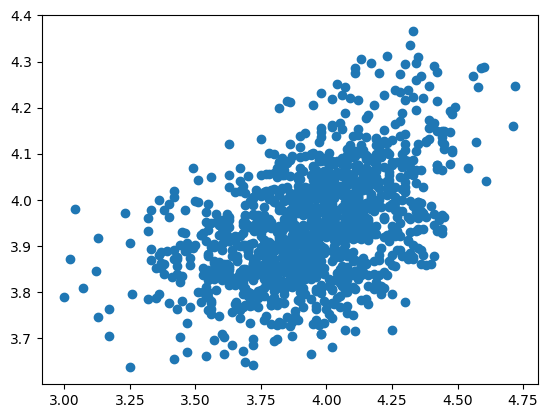

In [23]:
preds = automl.predict(X_test)
plt.scatter(y_test, preds)